# Poisson Spike generator
This tutorial shows how to use a poisson random process as a model for neural spiking

## What are random processes?
A random process is a a set $X = \{x_1, \ldots x_n\}$ of random variables. It represents the outcome of random variables over time.

## What is Instantaneous firing rate?
The instantanaeous firing rate of a neuron is the expected value of the neural response function. The neural respose function is defined as : 
$$\rho (t) = \sum_{i=1}^k \delta(t-t')$$
Where $k$ represents the total number of spikes in the spike train. As a refresher the delta functions has the properties 

$$
\begin{array}{c} \delta(t) = \big \{ \begin{array}{ccc} 1 & \text {if} & t = 0 \\ 0 & \text {otherwise} \end{array}  \\
\int_{-\infty}^\infty \delta(t) =  1 \\
\end{array}
$$

The spike count in an interval $(t_1 , t_2)$ can then be derived as:
$$n = \int_{t_1}^{t_2} \rho (t) dt$$

Now we arrive at the **instantaneous firing rate**, i.e. expected value of the neural response function as $$r(t) = \langle \rho(t)\rangle$$. 

In practice, however, we cannot get infinite number of trials. Therefore, the function will be estimated by averaging over a finite number of trials: $$ r_m(t) = \frac{1}{M}\sum_{j=1}^M \rho_j (t)$$ where $M$ is the number of trials and $\rho_j(t)$ is the neural response function for each trial.

# Poisson process
## homogeneous Poisson process
The homogeneous Poisson process assumes that the underlying instantaneous firing rate $r$ is constant over time. Let $T$ be a given interval. If we place one spike in the given interval, we can pick a sub-interval $(t_1, t_2)$ of length $\delta t = t_2 - t_1$. The probability of the spike occuring within a givin interval equals $\frac{\Delta t}{T}$. 

If $k$ spikes occur within $T$, the probability of finding $n$ spikes in the interval $(t_1, t_2)$ will be given by the binomial formula:
$$p (n \vert \delta t) = \frac{k!}{(k-n)! n!} p^n q^{k-n}$$ with $\frac{\Delta t}{T}$ and $q=1-p$ 

By increasing $k, T$ but keeping the ratio $r = \frac{k}{T}$ constant, it can be shown that as $k \rightarrow \infty$ the probability that $n$ spikes occur in the interval $\delta t$ equals:


\begin{equation}\label{eq:1}{p (n \vert \Delta t )} = \exp(-r\Delta t \frac{(r \Delta t)^n}{n!})\end{equation}

This formula is called the Poisson probability density function. It relates the mean firing rate $r$ to the probability of having $n$ spikes in the interval of length $\Delta t$. Please note that this relation assumes that spikes are independent of each other, which is not necessarily true in real systems. 

The spike count for a given interval can be described as : $$\langle n \rangle = \int_{t_1}^{t_2} r dt = r \Delta t$$ The variance (not shown) can be derived as : $$\sigma ² _n = r \Delta t$$

The ratio between variance and mean of the spike count is called the Fano Factor: $$F=\frac{\sigma^2_n}{\langle n \rangle} = 1$$

The fact that the ratio is equal is characteristic for Poisson processes. 

# Interspike intervals
Given any $t_0$, what is the waiting time for the next time to occur? This can be computed if we know the probability for no spike to occur within the interval $(t_0, t_0 + \tau)$. Plugging $n=0$ in $\ref{eq:1}$ we get:

$$ p(\text{next spike after } \tau ) = \exp(-r\tau)$$
Conversely, the probabilility that a spike **has** occured : 
$$p (\text{next spike occurs before } \tau ) = 1 - \exp(-r\tau)$$
From the last equation we can see that for $\tau = 0$ the probability is zero, conversely if interval after the spike increases, it will grow to 1. The probability density for the waiting time until the next spike is the derivative of the cumulative distribution above:
$$p(\tau) = \frac{d}{dt} ( 1 - \exp(-r\tau)) = r \exp(-rt)$$

Thus, thei nterspike interval density for a homogeneous Poisson spike train is an exponential function. The most likely interspike intervals are short, and long intervals have a probability that falls exponentially as a function of their duration. Interspike interval histograms can be extraced from data by counting the number of interspike intervals falling in various time bins. 

The mean duration between events is :
$$\langle \tau \rangle = \int_0^\infty \tau p(\tau) d\tau = 1/r$$


# Spike generations
Generating poisson processes is relatively straightforward:

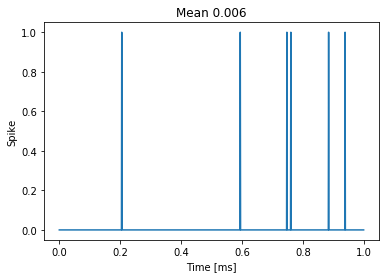

In [1]:
from numpy import *
from matplotlib.pyplot import subplots, show
def generate_spike_train(endT, rate, dt = 1e-3):
    time = arange(0, endT, dt)
    spikes = [1 if random.rand() < rate * dt else 0 for _ in time]
    return time, spikes
endT, rate, dt = 1, 10, 1e-3 # sec, hz, ms
time, spikes = generate_spike_train(endT, rate, dt)
fig, ax = subplots();
ax.plot(time, spikes)
ax.set_xlabel('Time [ms]'); ax.set_ylabel('Spike')
ax.set_title('Mean {}'.format(mean(spikes)))
show()

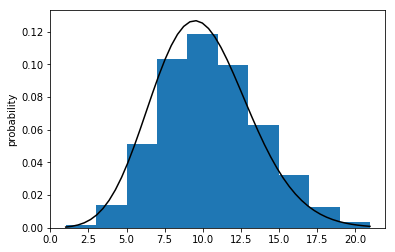

In [25]:
# generation of empirical spike trains
n = 1000
spikes = [generate_spike_train(endT, rate, dt)[1] for _ in range(n)]
mspikes = [sum(i)/endT for i in spikes]
fig, ax = subplots(); h = ax.hist(mspikes, normed = True)[:2]

# show the true underlying Poisson process
from scipy.special import factorial
counts, bins = h; n = linspace(bins[0], bins[-1])
p = [rate**ni / factorial(ni) * exp(-rate) for ni in n]
ax.set_ylabel('probability')
ax.plot(n, p, 'k')
show()

In [26]:
isis = ()
tmp = ()
for train in spikes:
    idx = where(array(train) > 0)[0] # get the time stamps
    tmp += (len(idx), )
    timings = [time[i] for i in idx]
    isi = diff(timings)
    isis += tuple(isi)
isis = array(isis).flatten()


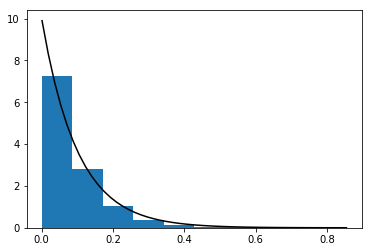

In [30]:
# plot Interspike Interval
fig, ax = subplots(); counts, bins, _ = ax.hist(isis, normed = True)
# plot the true distribution
x = linspace(bins[0], bins[-1])
ax.plot(x, rate * exp(-rate * x), 'k')
show()

# Inhomogeneous Poisson process